# LIME Local Explanation

In [1]:
import os
import warnings
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

from src.utils.models_pkl import load_pickle
from src.modeling.create_data_split import split_data
from src.explanation.local.utils import plot_bar
from src.explanation.local.lime_explainer import LimeExplainer
from config.config_modeling import CAT_COLS, TRAIN_SIZE, TEST_FROM_VAL, RANDOM_STATE

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Notebook settings

In [2]:
warnings.filterwarnings("ignore")

## Define constants

In [3]:
# Paths.
IN_PATH = Path(os.path.join("..", "..", "data")) / "data_plain.csv"
MODEL_PATH = Path(os.path.join("..", "..", "models")) / "XGB.pkl"

## Load data

In [4]:
data = split_data(
    cols=CAT_COLS,
    df=pd.read_csv(IN_PATH),
    train_size=TRAIN_SIZE,
    test_size=TEST_FROM_VAL,
    random_state=RANDOM_STATE,
)

X_train, Y_train = data["train"]
X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

X_test, Y_test = data["test"]
X_test.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

## Load model

In [5]:
model = load_pickle(MODEL_PATH)

# Validate model and data.
print(roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1]))
print(roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

0.8977178819987657
0.8601132732283131


## LIME Local Explanation

### Define SHAP Explainer

In [6]:
lime_explainer = LimeExplainer(prediction_function=model.predict_proba, dataset=X_train)

### Global explanation

In [7]:
res = lime_explainer.get_global_explanation(X_test[:1000], normalize=True)

100%|██████████| 1000/1000 [02:27<00:00,  6.76it/s]


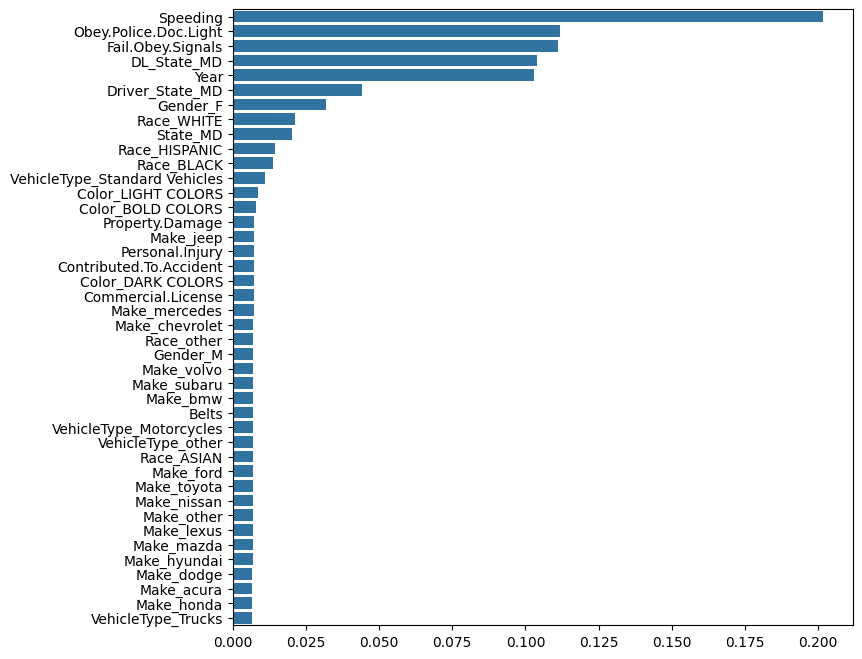

In [8]:
plt.figure(figsize=(8, 8))
plot_bar(dict(sorted(res.items(), key=lambda x: -x[1])), orient="h")